## **Segmentation of Credit Card Users in Python**

#### **Unsupervised Learning** 

**Atribution** https://github.com/muhammetbektas 

#### **1. Introduction**

Unlike Supervised Learning, Unsupervised learning has only independent variables and no corresponding target variable. Shortly, the data is unlabeled.

The aim of unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

We are going to aim to cluster a data set that is about behaviour of the customers having credit card.

**How many clusters can we distinguish the customers according to their transactions or behaviours ?**



#### **General View of Data**

The data set has 8950 transactions or informations about accounts that belong to customers.

**Features**

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONE OFF PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS PURCHASES : Amount of purchase done in installment

CASH ADVANCE : Cash in advance given by the user

PURCHASES FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONE OFF PURCHASES FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASES INSTALLMENTS FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASH ADVANCE FREQUENCY : How frequently the cash in advance being paid

CASH ADVANCE TRX : Number of Transactions made with "Cash in Advanced"

PURCHASES TRX : Number of purchase transactions made

CREDIT LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM PAYMENTS : Minimum amount of payments made by user

PRC FULL PAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Läs in vår datafil

In [2]:
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Hur ser vår datamängd ut?

In [3]:
print('This data set has {} rows and {} columns.\n'.format(df.shape[0],df.shape[1]))
df.info()

This data set has 8950 rows and 18 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX        

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

#### **Data Cleaning and EDA**

Customer ID verkar vara unikt och har därmed ingen funktion i att utreda hur vi kan klustra, den tar vi bort direkt. 


In [6]:
df.drop(['CUST_ID'], axis=1, inplace=True)


Inspektera distributionen hos datamängden med hjälp av visualisering

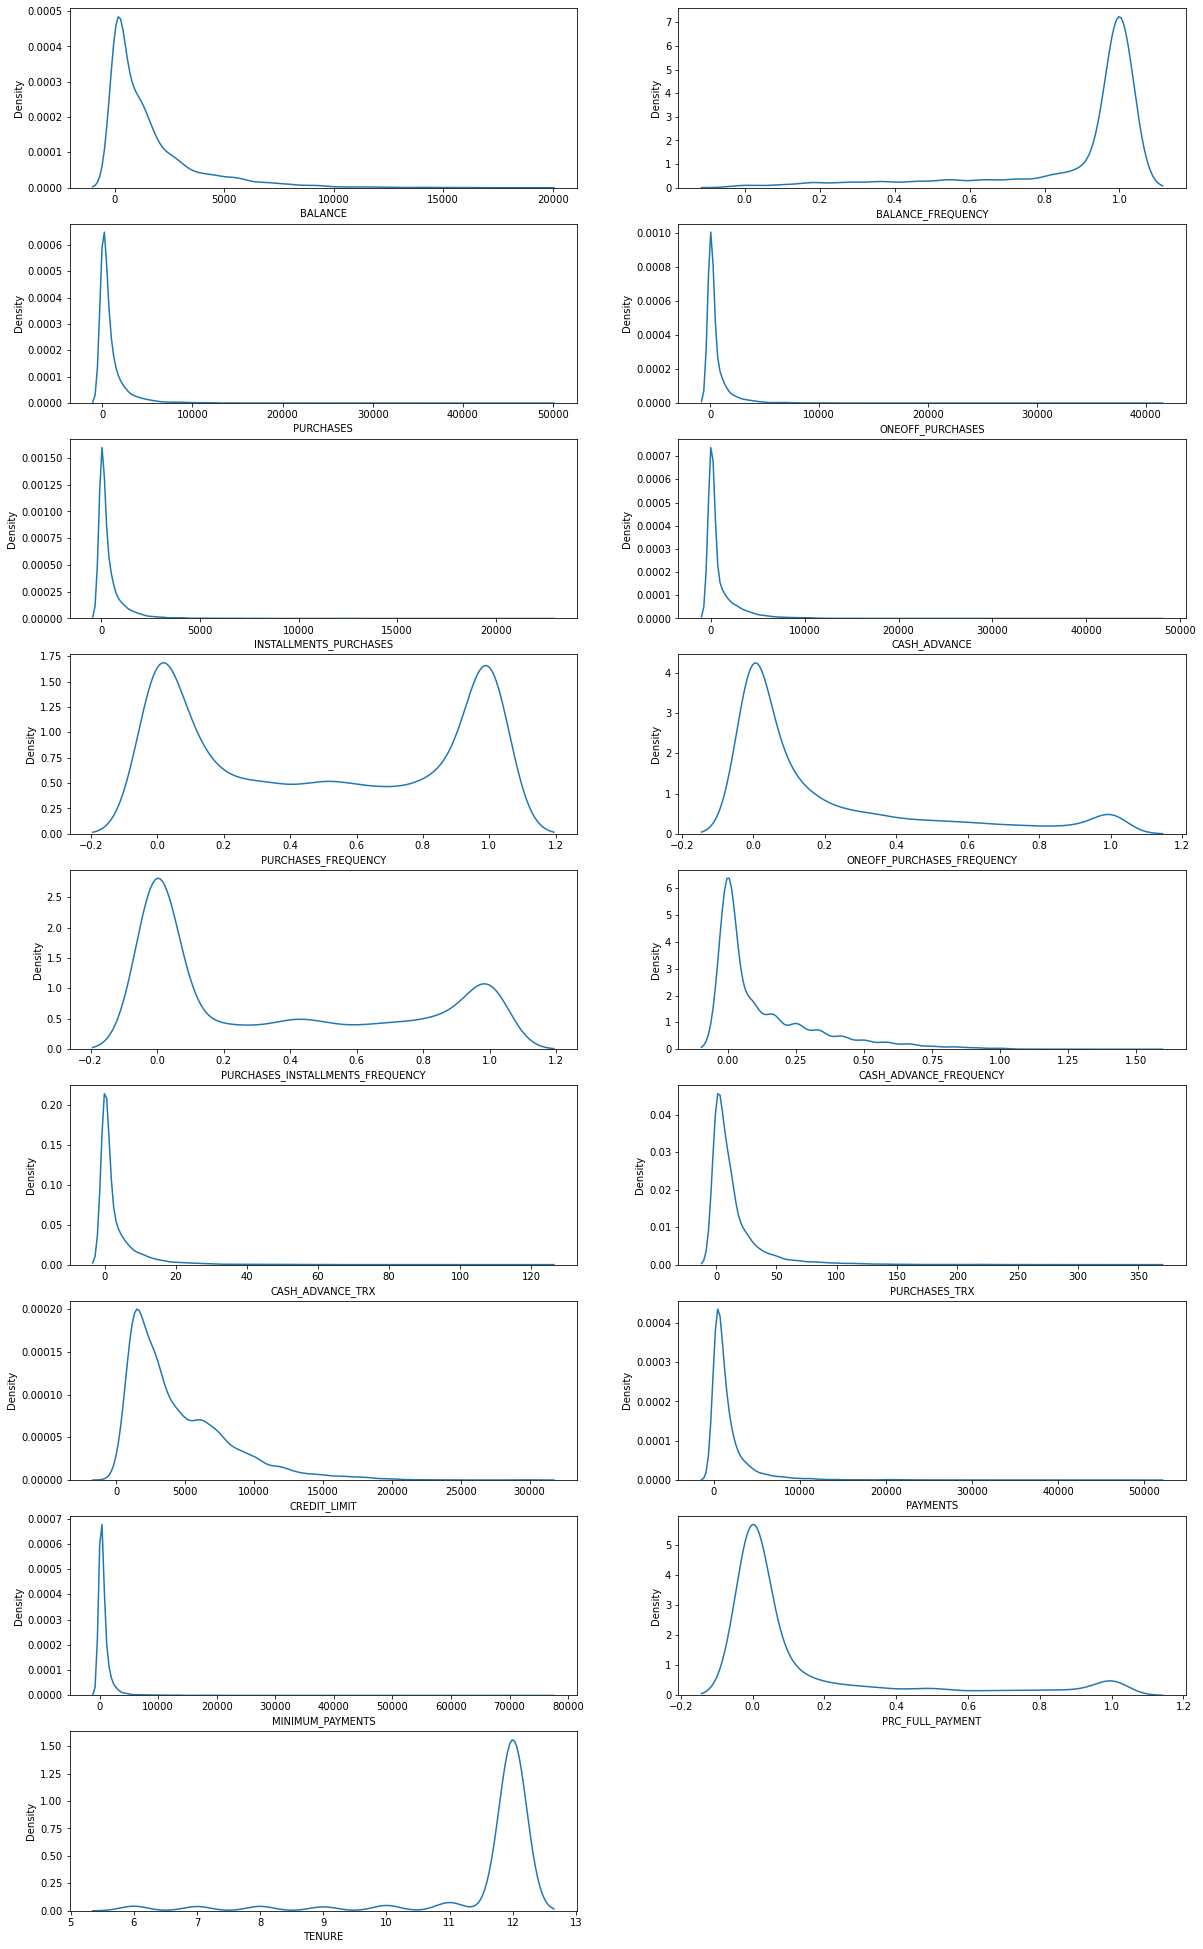

In [7]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Vi kan också titta på skevhet med pandas inbyggda skew. 

In [8]:
skewness=df.skew(axis=0)
skewness

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

Det finns mycket skevhet och varierande skalor och data. Hur avvikande värden (outliers) ska hanteras beror vad för typ av klustring vi ska utföra, kanske vill vi klustra två kluster för att identifiera vanliga värden och avvikande värden? 

In [9]:
#Inspektion av outliers, antal datapunkter som ligger utanför de understa och översta kvantilerna.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     841
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

**Missing values**


In [10]:
def null_values(df):
    nv=pd.DataFrame(df.isnull().sum()).rename(columns={0:'Missing_Records'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(df)

,Missing_Records
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1


Två columner har nullvärden, CREDIT_LIMIT har bara ett, det kan vi därmed bara droppa.

In [11]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Den andra variabeln,MINIMUM_PAYMENTS är lite mer utmanande, vad kan vi göra med den? Beror den på någon av de andra variablerna finns det kopplingar?  Vilken typ av saknade data är det?


In [12]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

Som vi såg i distributionsvisualiseringen så har vi data som är skev och i olika skalor, KMeans (och många andra klusteralgoritmer) behöver (oftast) normaliserad eller standardiserad data för att fungera bra. 

In [13]:
# StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale.
scaler=StandardScaler()
df_scl=scaler.fit_transform(df)

In [14]:
# Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
# It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in unsupervised learning.
norm=normalize(df_scl) 

In [15]:
# We can apply both (StandartScaler and Normalize) on our data before clustering. 
df_norm=pd.DataFrame(norm)

**K-Means Clustering**

**Number of clusters** 

To figure out the number of clusters that can be found out in our datasets, we can evaluate a set of indices or scores.
> * Elbow method
>
> * Silhoutte score
>
> * Davies Bouldin score

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_metrics(df, min_clust=2, max_clust=10, rand_state=1):
    inertias = []
    silhouette = []
    db_score = []
    for n_clust in range(min_clust, max_clust):
        kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
        y_label = kmeans.fit_predict(df)
        inertias.append(kmeans.inertia_)
        silhouette.append(silhouette_score(df, y_label))
        db_score.append(davies_bouldin_score(df, y_label))        

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].plot(range(min_clust, max_clust), inertias, '-x', linewidth=2)
    ax[0][0].set_xlabel('No. of clusters')
    ax[0][0].set_ylabel('Inertia')
    
    ax[0][1].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
    ax[0][1].set_xlabel('No. of clusters')
    ax[0][1].set_ylabel('Silhouette Score')
    
    ax[1][0].plot(range(min_clust, max_clust), db_score, '-x', linewidth=2)
    ax[1][0].set_xlabel('No. of clusters')
    ax[1][0].set_ylabel('Davies Bouldin Score')
    fig.suptitle('Metrics to evaluate the number of clusters')
    plt.show()

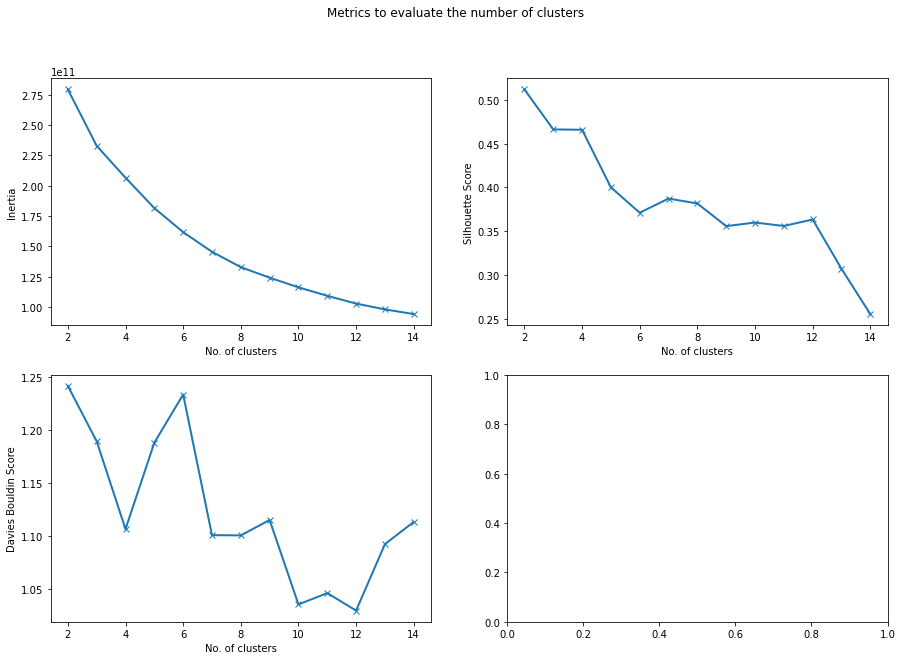

In [17]:
evaluate_metrics(df.iloc[:, :-2], min_clust=2, max_clust=15, rand_state=0)

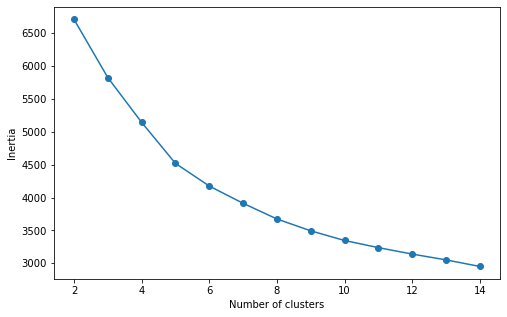

In [18]:
#Only elbow method
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=43)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The silhouette score measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [19]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.229 
Silhouette score for 6 clusters k-means : 0.245 
Silhouette score for 7 clusters k-means : 0.238 
Silhouette score for 8 clusters k-means : 0.24 
Silhouette score for 9 clusters k-means : 0.22 
Silhouette score for 10 clusters k-means : 0.217 


The values of silhouette score are close to each other in range 6 to 8. In the circumstances, Let's look at the another metric. The metric is Davies Bouldin that is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The minimum score is zero, with lower values indicating better clustering.

In [20]:
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print('Davies Bouldin Score:' +str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))

Davies Bouldin Score:1.403
Davies Bouldin Score:1.354
Davies Bouldin Score:1.411


Davies Bouldin är vanligtvis bättre ju lägre poäng, medan höga silouette score ibland kan indikera lämpligt kluster, men detta gäller inte alltid utan beror på omständigheterna. 

Givet det vi fått reda på från dessa tre värden, vilket är lämpligt antal kluster?

In [21]:
kmeans_labels=KMeans(n_clusters=7,random_state=43).fit_predict(df_norm)

In [22]:
df['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(df['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T

,0,5,3,2,4,1,6
Number of Customers,1865,1653,1550,1305,1150,771,655


In [23]:
means=pd.DataFrame(df.describe().loc['mean'])
means.T.iloc[:,[0,1,6,8,9,11,12,16]].round(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,TENURE
mean,1564.6,0.9,0.5,0.4,0.1,14.7,4494.4,11.5


In [24]:
df.set_index('Clusters')
grouped=df.groupby(by='Clusters').mean().round(1)
grouped.iloc[:,[0,1,6,8,9,11,12,16]]

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,TENURE
Clusters,,,,,,,,
0,1259.5,1.0,0.1,0.0,0.1,2.2,2780.3,11.9
1,99.6,0.9,0.8,0.7,0.0,16.6,4123.0,11.7
2,947.8,1.0,0.9,0.8,0.0,18.5,2906.4,11.9
3,4047.6,1.0,0.2,0.2,0.4,5.8,6750.4,11.7
4,131.8,0.4,0.2,0.2,0.0,4.1,3807.1,11.8
5,2020.6,1.0,0.9,0.6,0.1,44.6,7003.0,11.9
6,876.4,0.8,0.4,0.3,0.2,5.1,2513.8,7.4


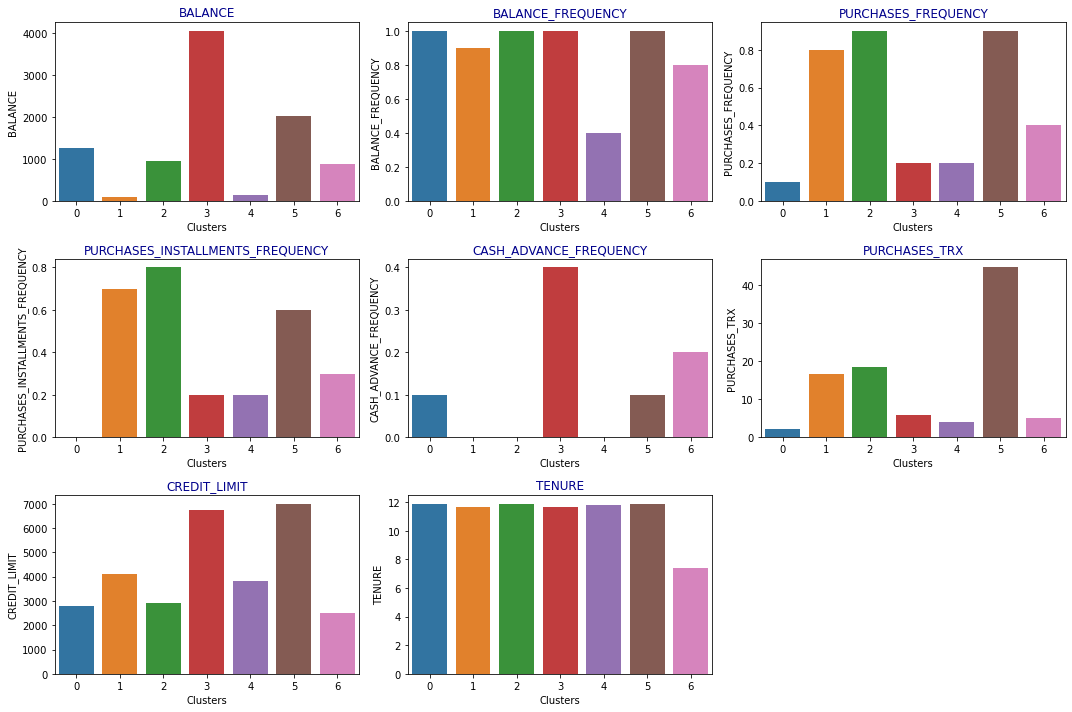

In [25]:
features=["BALANCE","BALANCE_FREQUENCY","PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","PURCHASES_TRX","CREDIT_LIMIT","TENURE"]
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

We have choosen some columns that are significant to identify the clusters.


Cluster 0 : The highest purchase frequency which tend to pay in installment, that is higher credit limit and long duration customers.

Cluster 1 : Pretty low balance and purchase frequency. They rarely use credit card and also they have lower credit limit.

Cluster 2 : This group is having the highest amount of customers and lowest usage of cards. Inactive customers, also long duration customers.

Cluster 3 : High tendency of payment installment, higher purchase frequency and their tenure time is above avarage.

Cluster 4 : The highest balance amount but purchase frequency is not that good. Tend to cash in advance, higher credit limit than others. They don’t like spending money.

Cluster 5 : Second highest purchase frequency and also higher tendency payment in installment. They are long duration customers.

Cluster 6 : The least quantity of customer is in this group which are below avarage of purchase frequency and a shortly duration customers.
